In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta 

In [2]:
uber  = pd.read_csv(r"\\studata08\home\LI\Liq23sc\ManW10\Desktop\uber.csv")

# Data exploration and processing 

In [3]:
uber.head(10)

,Request id,Pickup point,Driver id,Status,request_time,drop
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 09:17,12/07/2016 09:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3112,City,1.0,Trip Completed,13/07/2016 08:33,13/07/2016 09:25
5,3879,Airport,1.0,Trip Completed,13/07/2016 21:57,13/07/2016 22:28
6,4270,Airport,1.0,Trip Completed,14/07/2016 06:15,14/07/2016 07:13
7,5510,Airport,1.0,Trip Completed,15/07/2016 05:11,15/07/2016 06:07
8,6248,City,1.0,Trip Completed,15/07/2016 17:57,15/07/2016 18:50
9,267,City,2.0,Trip Completed,11/07/2016 06:46,11/07/2016 07:25


In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Request id    6745 non-null   int64  
 1   Pickup point  6745 non-null   object 
 2   Driver id     4095 non-null   float64
 3   Status        6745 non-null   object 
 4   request_time  6745 non-null   object 
 5   drop          2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [5]:
uber = uber.drop_duplicates() 
uber 

,Request id,Pickup point,Driver id,Status,request_time,drop
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 09:17,12/07/2016 09:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3112,City,1.0,Trip Completed,13/07/2016 08:33,13/07/2016 09:25
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15/07/2016 23:49,NaN
6741,6752,Airport,NaN,No Cars Available,15/07/2016 23:50,NaN
6742,6751,City,NaN,No Cars Available,15/07/2016 23:52,NaN
6743,6754,City,NaN,No Cars Available,15/07/2016 23:54,NaN


In [6]:
uber = uber.drop(columns=['Request id'])

In [7]:
#instead of using drop, subset the valid data 
uber = uber[uber['drop'].notna()]
uber

,Pickup point,Driver id,Status,request_time,drop
0,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,City,1.0,Trip Completed,12/07/2016 09:17,12/07/2016 09:58
3,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,City,1.0,Trip Completed,13/07/2016 08:33,13/07/2016 09:25
...,...,...,...,...,...
2826,Airport,300.0,Trip Completed,11/07/2016 22:54,11/07/2016 23:35
2827,City,300.0,Trip Completed,13/07/2016 06:31,13/07/2016 07:20
2828,Airport,300.0,Trip Completed,13/07/2016 12:33,13/07/2016 13:16
2829,Airport,300.0,Trip Completed,13/07/2016 22:26,13/07/2016 23:43


# Feature engineering

In [8]:
#convert 'drop' & 'request_time'to date format by pd.to_datetime 
uber[['request_time', 'drop']] = uber[['request_time', 'drop']].apply(pd.to_datetime)
uber

,Pickup point,Driver id,Status,request_time,drop
0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00
...,...,...,...,...,...
2826,Airport,300.0,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00
2827,City,300.0,Trip Completed,2016-07-13 06:31:00,2016-07-13 07:20:00
2828,Airport,300.0,Trip Completed,2016-07-13 12:33:00,2016-07-13 13:16:00
2829,Airport,300.0,Trip Completed,2016-07-13 22:26:00,2016-07-13 23:43:00


In [9]:
#create a new 'driving_time' column to return driving time 
uber['driving_time'] = uber['drop'] - uber['request_time']
uber 

,Pickup point,Driver id,Status,request_time,drop,driving_time
0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,0 days 01:09:00
1,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,0 days 00:50:00
2,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,0 days 00:41:00
3,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,0 days 00:55:00
4,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,0 days 00:52:00
...,...,...,...,...,...,...
2826,Airport,300.0,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,0 days 00:41:00
2827,City,300.0,Trip Completed,2016-07-13 06:31:00,2016-07-13 07:20:00,0 days 00:49:00
2828,Airport,300.0,Trip Completed,2016-07-13 12:33:00,2016-07-13 13:16:00,0 days 00:43:00
2829,Airport,300.0,Trip Completed,2016-07-13 22:26:00,2016-07-13 23:43:00,0 days 01:17:00


In [10]:
#create a 'Total_Minutes'column to store total minutes info from driving time
uber['Total_Minutes'] = uber['driving_time'].dt.total_seconds() /60
uber 

,Pickup point,Driver id,Status,request_time,drop,driving_time,Total_Minutes
0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,0 days 01:09:00,69.0
1,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,0 days 00:50:00,50.0
2,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,0 days 00:41:00,41.0
3,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,0 days 00:55:00,55.0
4,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,0 days 00:52:00,52.0
...,...,...,...,...,...,...,...
2826,Airport,300.0,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,0 days 00:41:00,41.0
2827,City,300.0,Trip Completed,2016-07-13 06:31:00,2016-07-13 07:20:00,0 days 00:49:00,49.0
2828,Airport,300.0,Trip Completed,2016-07-13 12:33:00,2016-07-13 13:16:00,0 days 00:43:00,43.0
2829,Airport,300.0,Trip Completed,2016-07-13 22:26:00,2016-07-13 23:43:00,0 days 01:17:00,77.0


In [11]:
uber = uber[uber['Total_Minutes'] > 0]
uber 

,Pickup point,Driver id,Status,request_time,drop,driving_time,Total_Minutes
0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,0 days 01:09:00,69.0
1,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,0 days 00:50:00,50.0
2,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,0 days 00:41:00,41.0
3,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,0 days 00:55:00,55.0
4,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,0 days 00:52:00,52.0
...,...,...,...,...,...,...,...
2826,Airport,300.0,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,0 days 00:41:00,41.0
2827,City,300.0,Trip Completed,2016-07-13 06:31:00,2016-07-13 07:20:00,0 days 00:49:00,49.0
2828,Airport,300.0,Trip Completed,2016-07-13 12:33:00,2016-07-13 13:16:00,0 days 00:43:00,43.0
2829,Airport,300.0,Trip Completed,2016-07-13 22:26:00,2016-07-13 23:43:00,0 days 01:17:00,77.0


In [12]:
#write a fucntion to categorise the 'Total_Minutes' info

def time_group(Total_Minutes):
    if Total_Minutes < 10:
        return 'Less than 10min'
    elif Total_Minutes >= 10 and Total_Minutes < 20:
        return '10-19min'
    elif Total_Minutes >= 20 and Total_Minutes < 30:
        return '20-29min'
    elif Total_Minutes >= 30 and Total_Minutes < 40:
        return '30-39min'
    elif Total_Minutes >= 40 and Total_Minutes < 60:
        return '40-59min'
    else:
        return '60+min'
    

In [13]:
#apply the function to create a new column 
uber['time_group'] = uber['Total_Minutes'].apply(time_group)
uber


C:\Users\LIQ23SC\AppData\Local\Temp\ipykernel_17848\3355425250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber['time_group'] = uber['Total_Minutes'].apply(time_group)


,Pickup point,Driver id,Status,request_time,drop,driving_time,Total_Minutes,time_group
0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,0 days 01:09:00,69.0,60+min
1,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,0 days 00:50:00,50.0,40-59min
2,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,0 days 00:41:00,41.0,40-59min
3,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,0 days 00:55:00,55.0,40-59min
4,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,0 days 00:52:00,52.0,40-59min
...,...,...,...,...,...,...,...,...
2826,Airport,300.0,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,0 days 00:41:00,41.0,40-59min
2827,City,300.0,Trip Completed,2016-07-13 06:31:00,2016-07-13 07:20:00,0 days 00:49:00,49.0,40-59min
2828,Airport,300.0,Trip Completed,2016-07-13 12:33:00,2016-07-13 13:16:00,0 days 00:43:00,43.0,40-59min
2829,Airport,300.0,Trip Completed,2016-07-13 22:26:00,2016-07-13 23:43:00,0 days 01:17:00,77.0,60+min


# Extracting insights 

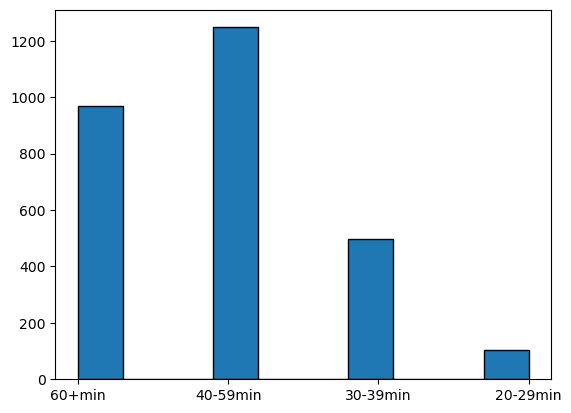

In [14]:
#find the most frequent driving time group 
plt.hist(uber['time_group'], bins=10, edgecolor='black')  
plt.show()

In [16]:
#now find the peak hours 
#create a 'Hour' column to store the hour info from 'request_time'
uber['Hour'] = uber['request_time'].dt.hour
uber 

C:\Users\LIQ23SC\AppData\Local\Temp\ipykernel_17848\1772696908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber['Hour'] = uber['request_time'].dt.hour


,Pickup point,Driver id,Status,request_time,drop,driving_time,Total_Minutes,time_group,Hour
0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,0 days 01:09:00,69.0,60+min,11
1,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,0 days 00:50:00,50.0,40-59min,17
2,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,0 days 00:41:00,41.0,40-59min,9
3,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,0 days 00:55:00,55.0,40-59min,21
4,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,0 days 00:52:00,52.0,40-59min,8
...,...,...,...,...,...,...,...,...,...
2826,Airport,300.0,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,0 days 00:41:00,41.0,40-59min,22
2827,City,300.0,Trip Completed,2016-07-13 06:31:00,2016-07-13 07:20:00,0 days 00:49:00,49.0,40-59min,6
2828,Airport,300.0,Trip Completed,2016-07-13 12:33:00,2016-07-13 13:16:00,0 days 00:43:00,43.0,40-59min,12
2829,Airport,300.0,Trip Completed,2016-07-13 22:26:00,2016-07-13 23:43:00,0 days 01:17:00,77.0,60+min,22


In [23]:
uber1  = pd.read_csv(r"\\studata08\home\LI\Liq23sc\ManW10\Desktop\uber.csv")

In [24]:
uber1[['request_time', 'drop']] = uber1[['request_time', 'drop']].apply(pd.to_datetime)
uber1

,Request id,Pickup point,Driver id,Status,request_time,drop
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT


In [25]:
uber1['Peak Hour'] = uber1['request_time'].dt.hour
uber1

,Request id,Pickup point,Driver id,Status,request_time,drop,Peak Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT,23


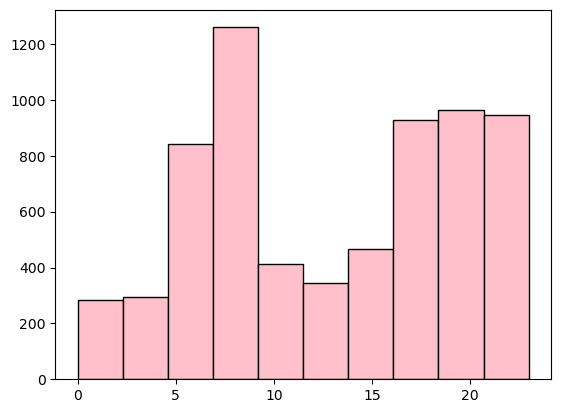

In [27]:
#plot the peak hrs distribution
plt.hist(uber1['Peak Hour'], bins=10, edgecolor='black', color = 'pink')  
plt.show()

In [33]:
#now let's investigate the time when there are no cars available 
uber2 = uber1[uber1['Status']=='No Cars Available']
uber2

,Request id,Pickup point,Driver id,Status,request_time,drop,Peak Hour
4095,1362,City,NaN,No Cars Available,2016-11-07 00:02:00,NaT,0
4096,1364,City,NaN,No Cars Available,2016-11-07 00:06:00,NaT,0
4097,1366,City,NaN,No Cars Available,2016-11-07 00:09:00,NaT,0
4098,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,0
4099,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT,0
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT,23


In [34]:
#now let's find out the hrs with no cars available 
uber2['No Cars Available Peak Hour'] = uber2['request_time'].dt.hour
uber2

C:\Users\LIQ23SC\AppData\Local\Temp\ipykernel_17848\1558273143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber2['No Cars Available Peak Hour'] = uber2['request_time'].dt.hour


,Request id,Pickup point,Driver id,Status,request_time,drop,Peak Hour,No Cars Available Peak Hour
4095,1362,City,NaN,No Cars Available,2016-11-07 00:02:00,NaT,0,0
4096,1364,City,NaN,No Cars Available,2016-11-07 00:06:00,NaT,0,0
4097,1366,City,NaN,No Cars Available,2016-11-07 00:09:00,NaT,0,0
4098,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,0,0
4099,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT,0,0
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT,23,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT,23,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT,23,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT,23,23


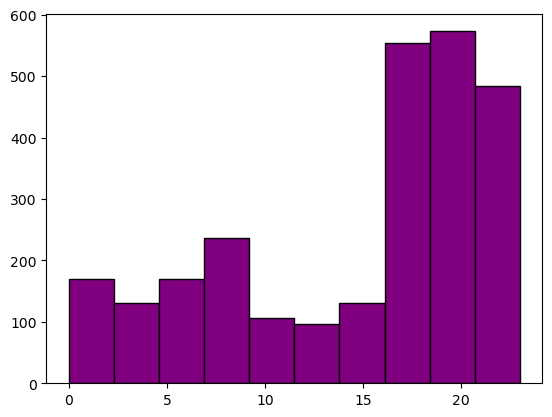

In [35]:
plt.hist(uber2['No Cars Available Peak Hour'], bins=10, edgecolor='black', color = 'purple')  
plt.show()

# Insights summary 
# 1) The driving duration of 40-59 minutes exhibits the highest frequency of occurences
# 2) The peak demand for uber occurs between 7.30 and 9.30, followed by the time period frm 16.00 to midnight
# 3) The time period from 17.30 to midnight experiences the highest amount of driving requests, but often with no available cars 